In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [506]:
%cd E:\OsAmA\2020\Deeplearning\Kaggle\Titanic

E:\OsAmA\2020\Deeplearning\Kaggle\Titanic


In [507]:
Titanic_path = 'train.csv'
data_train = pd.read_csv(Titanic_path)
data_test = pd.read_csv('test.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [508]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [509]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Survived')

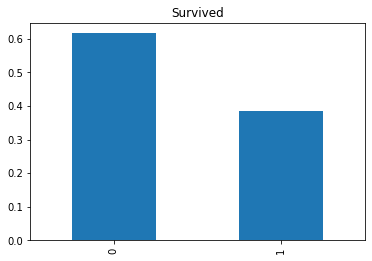

In [510]:
data_train.Survived.value_counts(normalize = True).plot(kind = 'bar')
plt.title('Survived')

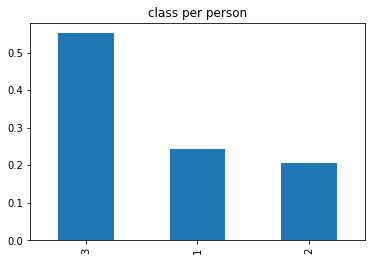

In [511]:
data_train.Pclass.value_counts(normalize = True).plot(kind='bar' , title = 'class per person')

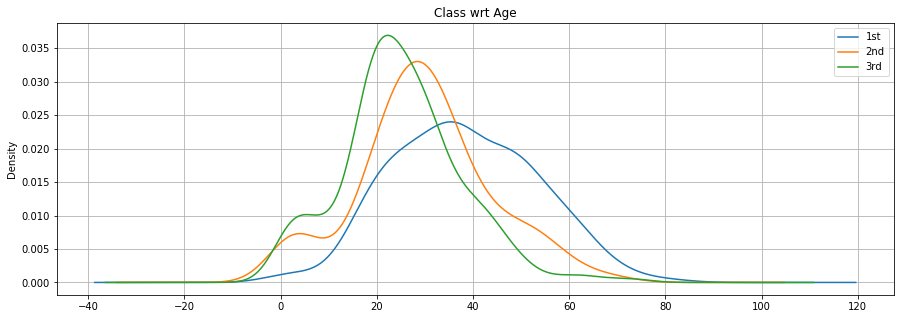

In [512]:
for x in [1,2,3]:
    data_train.Age[data_train.Pclass == x].plot(kind = 'kde' , figsize = (15,5)  ,grid = True )
plt.title('Class wrt Age')
plt.legend(('1st' , '2nd' , '3rd'))

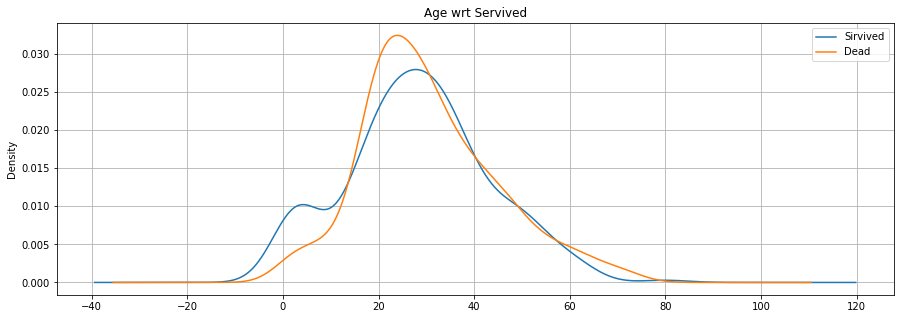

In [513]:
for x in [1,0]:
    data_train.Age[data_train.Survived == x].plot(kind = 'kde' , figsize = (15 , 5) , grid = True)
plt.title('Age wrt Servived')
plt.legend(('Sirvived' , 'Dead'))

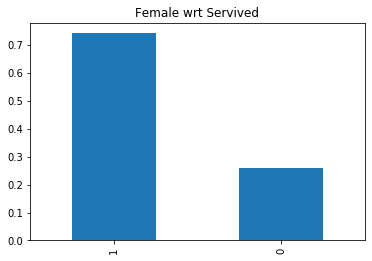

In [514]:
data_train.Survived[data_train.Sex == 'female'].value_counts(normalize = True).plot(kind='bar' , title = "Female wrt Servived")

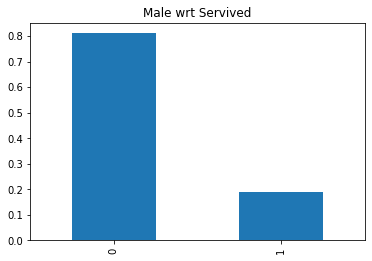

In [515]:
data_train.Survived[data_train.Sex == 'male'].value_counts(normalize = True).plot(kind='bar' , title = "Male wrt Servived")

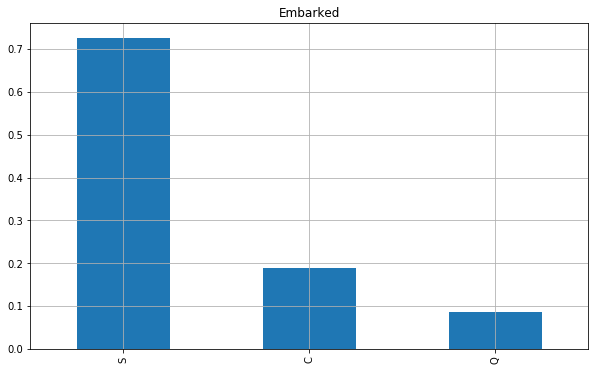

In [516]:
data_train.Embarked.value_counts(normalize = True).plot(kind = 'bar' , title = 'Embarked' , figsize = (10,6) , grid = True)

In [517]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [518]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Sex

In [519]:
data = [data_train , data_test]
sexMap = {'male': 0 , 'female' : 1}

for row in data:
    row.Sex = row.Sex.map(sexMap)

In [520]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


# Family

In [521]:
data_train['FamilySize'] = data_train['SibSp'] + data_train['Parch'] + 1
data_test['FamilySize'] = data_test['SibSp'] + data_test['Parch'] + 1
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [522]:
data_train = data_train.drop(['SibSp' , 'Parch'] , axis = 1)
data_test  = data_test.drop(['SibSp' , 'Parch'] , axis = 1)

In [523]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,1


In [524]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",0,34.5,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",0,27.0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,3101298,12.2875,NaN,S,3


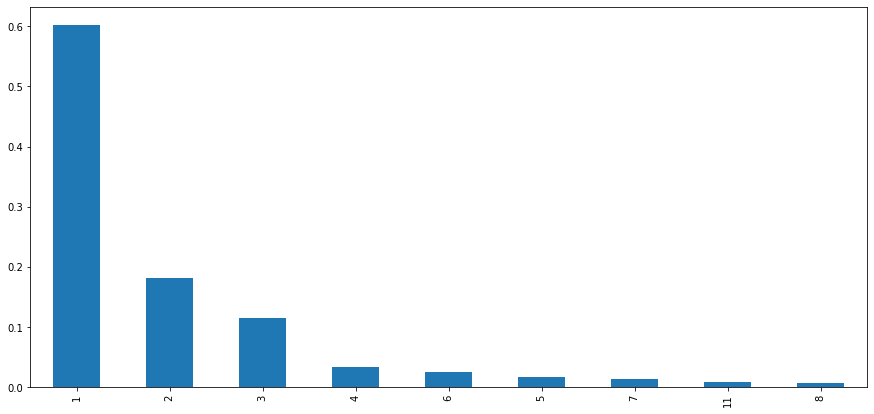

In [525]:
data_train.FamilySize.value_counts(normalize = True).plot(kind= 'bar' , figsize = (15 , 7))

In [526]:
data = [data_train , data_test]
family_mapping = {1 :0 , 2:0.2 , 3:0.4 , 4:0.6 , 5:0.8 , 6:1 , 7:1.2 , 8:1.4 , 9:1.6 , 10:1.8 , 11:2}
for dataset in data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [527]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  FamilySize   891 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 76.7+ KB


# Embarked

In [528]:
for dataset in data:
    dataset.Embarked = dataset.Embarked.fillna('S')

In [529]:
Embarked_map = {'S' : 1 , 'C' : 2 , 'Q' : 3 }

for dataset in data:
    dataset.Embarked = dataset.Embarked.map(Embarked_map)

In [530]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,1,0.2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,2,0.2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,1,0.2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,1,0.0


In [531]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",0,34.5,330911,7.8292,NaN,3,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,363272,7.0000,NaN,1,0.2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,240276,9.6875,NaN,3,0.0
3,895,3,"Wirz, Mr. Albert",0,27.0,315154,8.6625,NaN,1,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,3101298,12.2875,NaN,1,0.4


# Name

In [532]:
s = pd.Series(['Kelly, Mr. James', 'Wilkes, Mrs. James (Ellen Needs)', 'Wirz, Mr. Albert'])
s.str.extract(' ([A-Za-z]+)\.', expand=False)

0     Mr
1    Mrs
2     Mr
dtype: object

In [533]:
for dataset in data:
    dataset.Name = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [534]:
data_train.Name.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Ms            1
Sir           1
Mme           1
Lady          1
Don           1
Capt          1
Countess      1
Name: Name, dtype: int64

In [535]:
data_test.Name.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Name, dtype: int64

In [536]:
Name_map = {'Mr' : 0 , 'Miss' : 1 , 'Mrs' : 2 , 'Master' : 3 , 'Dr' : 3 , 'Rev' : 3 , 'Major' : 3 , 'Col' : 3 ,'Dona' : 3 ,
           'Mlle' : 3 , 'Jonkheer' : 3 , 'Ms' : 3 , 'Sir' : 3 , 'Mme' : 3 , 'Lady' : 3 , 'Don' : 3 , 'Capt' : 3 , 'Countess' : 3}
for dataset in data:
    dataset.Name = dataset.Name.map(Name_map)

In [537]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0,0,22.0,A/5 21171,7.2500,NaN,1,0.2
1,2,1,1,2,1,38.0,PC 17599,71.2833,C85,2,0.2
2,3,1,3,1,1,26.0,STON/O2. 3101282,7.9250,NaN,1,0.0
3,4,1,1,2,1,35.0,113803,53.1000,C123,1,0.2
4,5,0,3,0,0,35.0,373450,8.0500,NaN,1,0.0


In [538]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,0,0,34.5,330911,7.8292,NaN,3,0.0
1,893,3,2,1,47.0,363272,7.0000,NaN,1,0.2
2,894,2,0,0,62.0,240276,9.6875,NaN,3,0.0
3,895,3,0,0,27.0,315154,8.6625,NaN,1,0.0
4,896,3,2,1,22.0,3101298,12.2875,NaN,1,0.4


# Fare

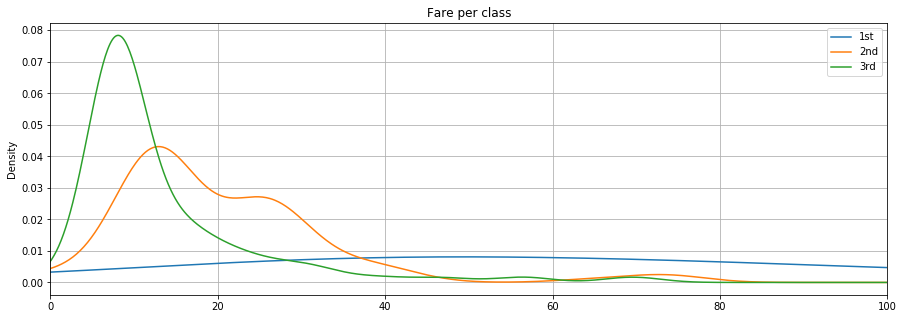

In [539]:
for x in [1,2,3]:
    data_train.Fare[data_train.Pclass == x].plot(kind = 'kde' , figsize = (15 , 5) , title = 'Fare per class' , grid = True)
plt.xlim((0 , 100))
plt.legend(['1st' , '2nd' , '3rd'])

In [540]:
data_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [541]:
data_test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [542]:
data_train.Fare.fillna(data_train.groupby('Pclass')['Fare'].transform('median') , inplace = True)
data_test.Fare.fillna(data_test.groupby('Pclass')['Fare'].transform('median') , inplace = True)

In [543]:
for dataset in data:
    dataset.loc[dataset.Fare < 8  , 'Fare'] = 0
    dataset.loc[(dataset.Fare > 8 )  & (dataset.Fare <= 20) , 'Fare'] = 0.5
    dataset.loc[(dataset.Fare > 20)  & (dataset.Fare <= 30) , 'Fare'] = 1
    dataset.loc[(dataset.Fare > 30)  & (dataset.Fare <= 40) , 'Fare'] = 1.5
    dataset.loc[(dataset.Fare > 40)  & (dataset.Fare <= 60) , 'Fare'] = 2
    dataset.loc[(dataset.Fare > 60)  & (dataset.Fare <= 80) , 'Fare'] = 2.5
    dataset.loc[ dataset.Fare > 80 , 'Fare'] = 3
    

In [544]:
data_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0,0,22.0,A/5 21171,0.0,NaN,1,0.2
1,2,1,1,2,1,38.0,PC 17599,2.5,C85,2,0.2
2,3,1,3,1,1,26.0,STON/O2. 3101282,0.0,NaN,1,0.0
3,4,1,1,2,1,35.0,113803,2.0,C123,1,0.2
4,5,0,3,0,0,35.0,373450,0.5,NaN,1,0.0
5,6,0,3,0,0,NaN,330877,0.5,NaN,3,0.0
6,7,0,1,0,0,54.0,17463,2.0,E46,1,0.0
7,8,0,3,3,0,2.0,349909,1.0,NaN,1,0.8
8,9,1,3,2,1,27.0,347742,0.5,NaN,1,0.4
9,10,1,2,2,1,14.0,237736,1.5,NaN,2,0.2


# Age

In [545]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     891 non-null    int64  
 10  FamilySize   891 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


In [546]:
data_train.Age.fillna(data_train.groupby('Name')['Age'].transform('median') , inplace = True)
data_test.Age.fillna(data_test.groupby('Name')['Age'].transform('median') , inplace = True)

In [547]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     891 non-null    int64  
 10  FamilySize   891 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


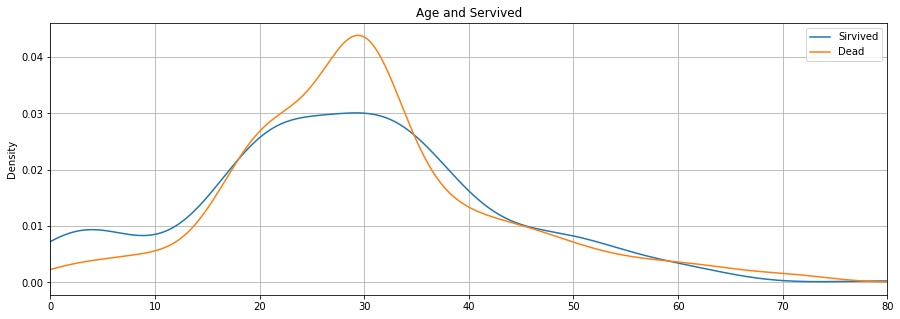

In [548]:
for x in [1,0]:
    data_train.Age[data_train.Survived == x].plot(kind = 'kde' , figsize = (15 , 5) , grid = True)
plt.title('Age and Servived')
plt.xlim((0 , data_train.Age.max()))
plt.legend(('Sirvived' , 'Dead'))

In [549]:
for dataset in data:
    dataset.loc[dataset.Age <= 17 , 'Age'] = 0
    dataset.loc[(dataset.Age > 17) &  (dataset.Age <= 34), 'Age'] = 1
    dataset.loc[(dataset.Age > 34) &  (dataset.Age <= 60), 'Age'] = 2
    dataset.loc[dataset.Age > 60, 'Age'] = 3

In [550]:
data_train.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0,0,1.0,A/5 21171,0.0,NaN,1,0.2
1,2,1,1,2,1,2.0,PC 17599,2.5,C85,2,0.2
2,3,1,3,1,1,1.0,STON/O2. 3101282,0.0,NaN,1,0.0
3,4,1,1,2,1,2.0,113803,2.0,C123,1,0.2
4,5,0,3,0,0,2.0,373450,0.5,NaN,1,0.0
5,6,0,3,0,0,1.0,330877,0.5,NaN,3,0.0
6,7,0,1,0,0,2.0,17463,2.0,E46,1,0.0
7,8,0,3,3,0,0.0,349909,1.0,NaN,1,0.8
8,9,1,3,2,1,1.0,347742,0.5,NaN,1,0.4
9,10,1,2,2,1,0.0,237736,1.5,NaN,2,0.2


# Cabin

In [551]:
data_train.Cabin.value_counts().head(50)

B96 B98            4
C23 C25 C27        4
G6                 4
F33                3
D                  3
F2                 3
C22 C26            3
E101               3
C65                2
D33                2
C78                2
C2                 2
B18                2
B5                 2
B58 B60            2
D17                2
F G73              2
B49                2
C93                2
E33                2
E67                2
C126               2
E8                 2
C123               2
F4                 2
B22                2
B51 B53 B55        2
E44                2
C52                2
B20                2
E25                2
C83                2
D35                2
C125               2
D26                2
E24                2
B35                2
C124               2
B77                2
B28                2
C92                2
E121               2
D36                2
C68                2
B57 B59 B63 B66    2
D20                2
C110               1
B78          

In [552]:
for dataset in data:
    dataset.Cabin = dataset.Cabin.str[:1]

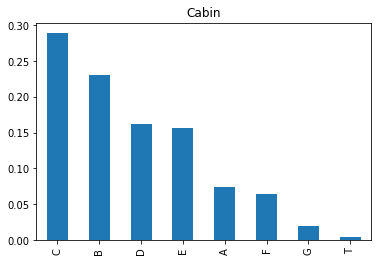

In [553]:
data_train.Cabin.value_counts(normalize = True).plot(kind = 'bar' , title = 'Cabin')

In [554]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     891 non-null    int64  
 10  FamilySize   891 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


In [555]:
cabinMap = {'C' : 0 , 'B' : 0.3 , 'D' : 0.6 , 'E' : 0.9 , 'A' : 1.2 , 'F' : 1.5 , 'T' : 1.8}
for dataset in data:
    dataset.Cabin = dataset.Cabin.map(cabinMap)

In [556]:
data_train.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0,0,1.0,A/5 21171,0.0,NaN,1,0.2
1,2,1,1,2,1,2.0,PC 17599,2.5,0.0,2,0.2
2,3,1,3,1,1,1.0,STON/O2. 3101282,0.0,NaN,1,0.0
3,4,1,1,2,1,2.0,113803,2.0,0.0,1,0.2
4,5,0,3,0,0,2.0,373450,0.5,NaN,1,0.0
5,6,0,3,0,0,1.0,330877,0.5,NaN,3,0.0
6,7,0,1,0,0,2.0,17463,2.0,0.9,1,0.0
7,8,0,3,3,0,0.0,349909,1.0,NaN,1,0.8
8,9,1,3,2,1,1.0,347742,0.5,NaN,1,0.4
9,10,1,2,2,1,0.0,237736,1.5,NaN,2,0.2


In [557]:
data_train.Cabin.fillna(data_train.groupby('Pclass')['Cabin'].transform('median') , inplace = True)
data_test.Cabin.fillna(data_test.groupby('Pclass')['Cabin'].transform('median') , inplace = True)

In [558]:
data_train.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0,0,1.0,A/5 21171,0.0,1.5,1,0.2
1,2,1,1,2,1,2.0,PC 17599,2.5,0.0,2,0.2
2,3,1,3,1,1,1.0,STON/O2. 3101282,0.0,1.5,1,0.0
3,4,1,1,2,1,2.0,113803,2.0,0.0,1,0.2
4,5,0,3,0,0,2.0,373450,0.5,1.5,1,0.0
5,6,0,3,0,0,1.0,330877,0.5,1.5,3,0.0
6,7,0,1,0,0,2.0,17463,2.0,0.9,1,0.0
7,8,0,3,3,0,0.0,349909,1.0,1.5,1,0.8
8,9,1,3,2,1,1.0,347742,0.5,1.5,1,0.4
9,10,1,2,2,1,0.0,237736,1.5,1.2,2,0.2


# Finishing 

In [559]:
train = data_train.drop(['Ticket' , 'PassengerId'] , axis = 1)
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,0,0,1.0,0.0,1.5,1,0.2
1,1,1,2,1,2.0,2.5,0.0,2,0.2
2,1,3,1,1,1.0,0.0,1.5,1,0.0
3,1,1,2,1,2.0,2.0,0.0,1,0.2
4,0,3,0,0,2.0,0.5,1.5,1,0.0


In [560]:
X_train = train.drop('Survived' , axis = 1)
y_train = train['Survived']

In [561]:
X_train.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,0,0,1.0,0.0,1.5,1,0.2
1,1,2,1,2.0,2.5,0.0,2,0.2
2,3,1,1,1.0,0.0,1.5,1,0.0
3,1,2,1,2.0,2.0,0.0,1,0.2
4,3,0,0,2.0,0.5,1.5,1,0.0


In [562]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [563]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,0,0,2.0,330911,0.0,1.5,3,0.0
1,893,3,2,1,2.0,363272,0.0,1.5,1,0.2
2,894,2,0,0,3.0,240276,0.5,1.5,3,0.0
3,895,3,0,0,1.0,315154,0.5,1.5,1,0.0
4,896,3,2,1,1.0,3101298,0.5,1.5,1,0.4


 # Training & Modeling

In [564]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [565]:
Kfold = KFold(n_splits=10 , shuffle= True , random_state= 0)

# SVM

In [566]:
classifier = SVC(kernel= 'rbf')
scores = cross_val_score(classifier , X_train , y_train , cv= Kfold , scoring= 'accuracy')
print(scores)

[0.83333333 0.79775281 0.80898876 0.80898876 0.84269663 0.82022472
 0.83146067 0.84269663 0.80898876 0.80898876]


In [567]:
np.mean(scores)*100

82.04119850187267

# LogesticRegresstion

In [568]:
classifier = LogisticRegression()
scores = cross_val_score(classifier , X_train , y_train , cv= Kfold , scoring = 'accuracy')
print(scores)

[0.8        0.79775281 0.80898876 0.7752809  0.80898876 0.82022472
 0.80898876 0.85393258 0.80898876 0.84269663]


In [569]:
np.mean(scores)*100

81.25842696629213

# KNN

In [570]:
classifier = KNeighborsClassifier()
scores = cross_val_score(classifier , X_train , y_train , cv= Kfold , scoring = 'accuracy')
print(scores)

[0.8        0.85393258 0.84269663 0.74157303 0.84269663 0.76404494
 0.83146067 0.80898876 0.80898876 0.83146067]


In [571]:
np.mean(scores)*100

81.25842696629215

# Naive_Bayes

In [572]:
classifier = GaussianNB()
scores = cross_val_score(classifier , X_train , y_train , cv= Kfold , scoring = 'accuracy')
print(scores)

[0.82222222 0.75280899 0.75280899 0.76404494 0.76404494 0.80898876
 0.7752809  0.78651685 0.84269663 0.86516854]


In [573]:
np.mean(scores)*100

79.3458177278402

# DecisionTree

In [574]:
classifier = DecisionTreeClassifier()
scores = cross_val_score(classifier , X_train , y_train , cv= Kfold , scoring = 'accuracy')
print(scores)

[0.82222222 0.83146067 0.7752809  0.78651685 0.85393258 0.7752809
 0.87640449 0.78651685 0.76404494 0.79775281]


In [575]:
np.mean(scores)*100

80.69413233458178

# RandomForest

In [576]:
classifier =RandomForestClassifier()
scores = cross_val_score(classifier , X_train , y_train , cv= Kfold , scoring = 'accuracy')
print(scores)

[0.83333333 0.84269663 0.78651685 0.75280899 0.84269663 0.79775281
 0.86516854 0.80898876 0.79775281 0.76404494]


In [577]:
np.mean(scores)*100

80.91760299625467

# Testing on SVM

In [578]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,0,0,2.0,330911,0.0,1.5,3,0.0
1,893,3,2,1,2.0,363272,0.0,1.5,1,0.2
2,894,2,0,0,3.0,240276,0.5,1.5,3,0.0
3,895,3,0,0,1.0,315154,0.5,1.5,1,0.0
4,896,3,2,1,1.0,3101298,0.5,1.5,1,0.4


In [579]:
test = data_test.drop(['PassengerId' , 'Ticket'] , axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    int64  
 2   Sex         418 non-null    int64  
 3   Age         418 non-null    float64
 4   Fare        418 non-null    float64
 5   Cabin       418 non-null    float64
 6   Embarked    418 non-null    int64  
 7   FamilySize  418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [581]:
classifier = SVC()
classifier.fit(X_train , y_train)
prediction = classifier.predict(test)

In [584]:
Submition = pd.DataFrame({'PassengerId' : data_test['PassengerId'] , 'Survived' : prediction})
Submition.to_csv('Submition.csv' , index = False)

In [585]:
Submition.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
